In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import pandas as pd

In [2]:
def Rsquare(list_e, list_t):
    return 1 - np.sum((list_e - list_t)**2) / np.sum((list_e - np.average(list_e))**2)
def chisquare(list_e, list_t):
    return np.sum((list_e - list_t)**2/list_t)
def Gtest(list_e, list_t, cut):
    return 2*np.sum(list_t[list_t>cut]-list_e[list_t>cut]+list_e[list_t>cut]*np.log(list_e[list_t>cut]/list_t[list_t>cut]))

In [3]:
import matplotlib as mpl
mpl.rcParams.update({
    'font.family' : 'STIXGeneral',
    'mathtext.fontset' : 'stix',
    'xtick.direction' : 'in' ,
    'xtick.labelsize' : 11.5 ,
    'ytick.direction' : 'in' ,
    'ytick.labelsize' : 11.5 ,
    'axes.labelsize' : 16,
    'legend.frameon' : True,
    'savefig.dpi' : 600 
})

In [30]:
lb1=['U_a', 'I_a', 'U_b', 'I_b', 'U_c', 'I_c', 'U_d', 'I_d', 'U_e', 'I_e']
plot_list = ['a', 'b', 'c', 'd', 'e']
mk = ['o', '^', 's', 'D', 'v']
ls = [':', '--', '-.', (0, (3,1,1,1,1,1)), '-']
clr = ['b', 'r', 'g', 'c', 'k']

p1 = pd.read_excel('PE8_ne.xlsx', names=lb1)
p2 = pd.read_excel('PE8_hg.xlsx', names=lb1[:2])

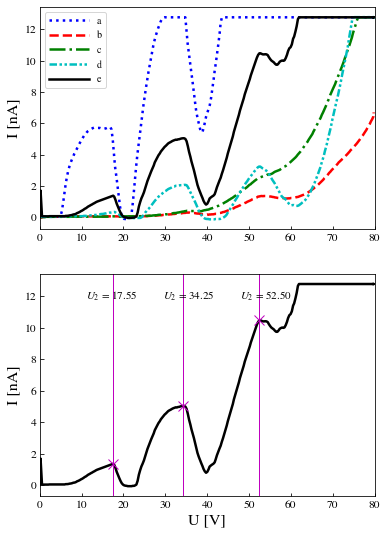

In [71]:
fig, ax = plt.subplots(2, 1, figsize=(6, 9))

peaks, _ = find_peaks(p1.I_e, height=0, distance=20)
for i in range (5):
    ax[0].plot(p1[lb1[2*i]], p1[lb1[2*i+1]], linestyle = ls[i], c = clr[i], lw = 2.5, label=plot_list[i])
ax[1].plot(p1.U_e, p1.I_e, 'k-', lw=2.5)
ax[1].plot(p1.U_e[peaks[1:]], p1.I_e[peaks[1:]], 'mx', markersize=10)
for i in range (3):
    txt = '$U_2$ = %.2f' % (p1.U_e[peaks[i+1]])
    ax[1].axvline(x = p1.U_e[peaks[i+1]], c = 'm', lw = 1, label=txt)

ax[0].set_xlim(0, 80)
ax[1].set_xlim(0, 80)
ax[1].set_xlabel('U [V]')
ax[0].set_ylabel('I [nA]')
ax[1].set_ylabel('I [nA]')
ax[0].legend(handlelength=4)
ax[1].legend(fontsize=11, handlelength=0, ncol=3, frameon=False, loc=(0.1, 0.85), columnspacing=1.5)


plt.savefig('8_1.png', bbox_inches='tight')

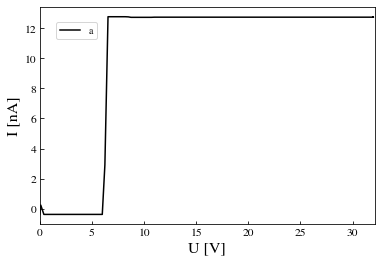

In [76]:
plt.plot(p2.U_a, p2.I_a, 'k-', label='a')
plt.xlim(0, 32.1)
plt.xlabel('U [V]')
plt.ylabel('I [nA]')
plt.legend(loc=(0.05, 0.85))


plt.savefig('8_2.png', bbox_inches='tight')